<a href="https://colab.research.google.com/github/phycoding/my_first_blog/blob/main/ImageEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install notebook>=5.3

In [ ]:
!pip install fiftyone
!pip install torch torchvision umap-learn
!pip install ipywidgets>=7.5

Split 'test' already downloaded
Loading existing dataset 'lfw-test'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


Dataset:          lfw-test
Media type:       image
Num samples:      3708
Selected samples: 0
Selected labels:  0
Session type:     colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


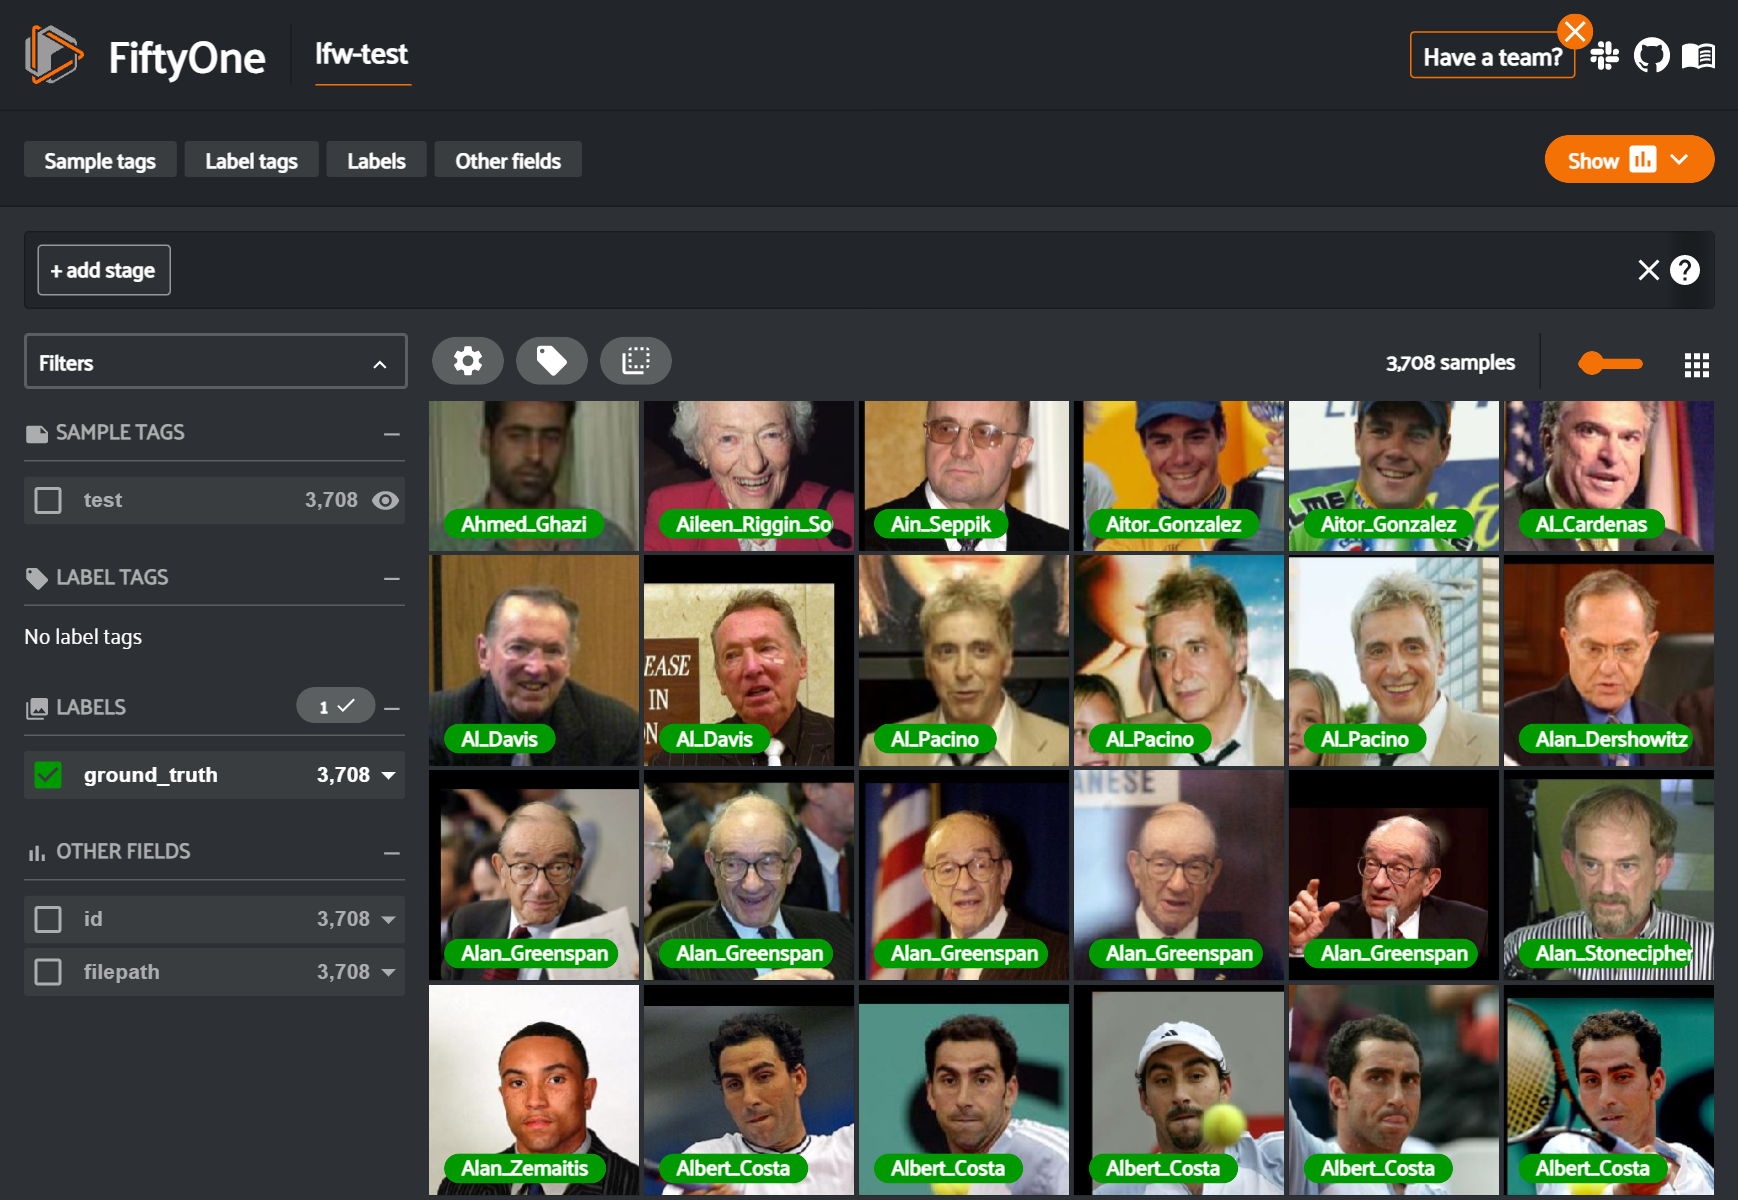

<IPython.core.display.Javascript object>

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
dataset = foz.load_zoo_dataset('lfw',split='test')
fo.launch_app(dataset)

In [ ]:
test_split = dataset.match_tags("test")

In [ ]:
import cv2
import numpy as np
import fiftyone.brain as fob
embeddings = np.array([cv2.imread(f,cv2.IMREAD_UNCHANGED).ravel() for f in test_split.values('filepath')])


In [ ]:
results = fob.compute_visualization(test_split,embeddings=embeddings,method='umap')

Generating visualization...
UMAP( verbose=True)


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Sat Nov 27 22:21:09 2021 Construct fuzzy simplicial set
Sat Nov 27 22:33:05 2021 Finding Nearest Neighbors
Sat Nov 27 22:33:09 2021 Finished Nearest Neighbor Search
Sat Nov 27 22:33:12 2021 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sat Nov 27 22:33:25 2021 Finished embedding


In [ ]:
session = fo.launch_app(view=test_split)

In [ ]:
plot = results.visualize(labels="ground_truth.label")
plot.show()

# Attach plot to session
session.plots.attach(plot)

/usr/local/lib/python3.7/dist-packages/fiftyone/core/plots/plotly.py:1381: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.

